In [1]:
! git clone https://github.com/4uiiurz1/pytorch-nested-unet.git

Cloning into 'pytorch-nested-unet'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 77 (delta 19), reused 16 (delta 16), pack-reused 53
Unpacking objects: 100% (77/77), done.


In [ ]:
# !git clone https://github.com/MrGiovanni/UNetPlusPlus.git

In [2]:
!gdown 1e1QD_28uN0KxmJTzQtVbJXsOiNX7ya1k

Downloading...
From: https://drive.google.com/uc?id=1e1QD_28uN0KxmJTzQtVbJXsOiNX7ya1k
To: /content/b_use_model_dataset.zip
100% 20.0M/20.0M [00:00<00:00, 67.7MB/s]


In [3]:
!mkdir /content/dataset

In [ ]:
! unzip /content/b_use_model_dataset.zip -d /content/dataset

In [5]:
%cd /content/pytorch-nested-unet

/content/pytorch-nested-unet


In [6]:
!pwd

/content/pytorch-nested-unet


In [7]:
!ls

archs.py    LICENSE	models		       README.md	 utils.py
dataset.py  losses.py	outputs		       requirements.txt  val.py
inputs	    metrics.py	preprocess_dsb2018.py  train.py


In [ ]:
!python train.py --dataset /content/dataset --arch NestedUNet --img_ext .jpg --mask_ext .jpg --batch_size 1 --lr 1e-4 --num_classes 5 --input_w 512 --input_h 512  --epochs 10

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('/content/pytorch-nested-unet/models/content/b_use_model_dataset_NestedUNet_woDS/log.csv')
df

,epoch,lr,loss,iou,val_loss,val_iou
0,0,0.0001,1.206752,0.106893,1.218846,0.117025
1,1,0.0001,1.182919,0.133945,1.214394,0.122785
2,2,0.0001,1.164290,0.154819,1.243686,0.093995
3,3,0.0001,1.171812,0.150642,1.234092,0.100631
4,4,0.0001,1.165520,0.151247,1.201375,0.131992
5,5,0.0001,1.160130,0.154712,1.197524,0.135585
6,6,0.0001,1.154038,0.166467,1.181625,0.158807
7,7,0.0001,1.150317,0.176670,1.177990,0.162119
8,8,0.0001,1.132467,0.191068,1.174303,0.167905
9,9,0.0001,1.134085,0.193233,1.169899,0.172096


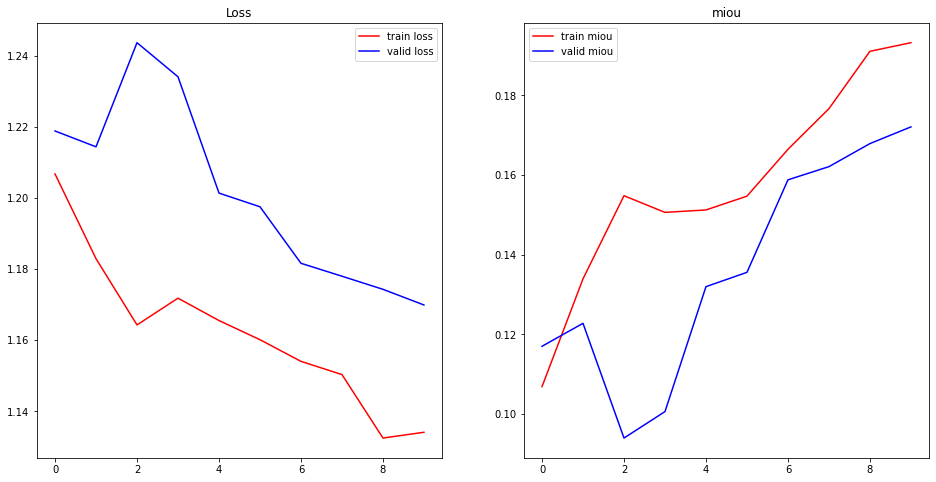

In [19]:
fig = plt.figure(figsize=(16, 8))


ax = fig.add_subplot(1, 2, 1)
ax.plot(df["loss"], color="red", label="train loss")
ax.plot(df["val_loss"], color="blue", label="valid loss")
ax.title.set_text("Loss")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(df["iou"], color="red", label="train miou")
ax.plot(df["val_iou"], color="blue", label="valid miou")
ax.title.set_text("miou")
ax.legend()

plt.show()